# Early Stage Diabetes Indicator
Published by Emmanuella Budu

Diabetes is a health condition that disrupts the body's ability to regulate blood sugar. It occurs when the body cannot effectively use insulin, which is the hormone that processes or regulates blood sugar. If not treated early enough,it eventually results in death. In 2016, the World Health Organization reported that approximately 422 million people in the world have Diabetes.
Suppose we have the medical history of Diabetic patients, can we use Machine Learning to determine which patients are likely to develop early stage Diabetes?.

# 1. Preliminaries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
#load datasets
diabetes_df= pd.read_csv(".../data/diabetes_data_upload.csv")

#make a copy
diabetes_df_og=diabetes_df.copy()


In [3]:
# A view of the datset
diabetes_df.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


# 2. Details about the datset

In [4]:
#details about the fields in the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
Age                   520 non-null int64
Gender                520 non-null object
Polyuria              520 non-null object
Polydipsia            520 non-null object
sudden weight loss    520 non-null object
weakness              520 non-null object
Polyphagia            520 non-null object
Genital thrush        520 non-null object
visual blurring       520 non-null object
Itching               520 non-null object
Irritability          520 non-null object
delayed healing       520 non-null object
partial paresis       520 non-null object
muscle stiffness      520 non-null object
Alopecia              520 non-null object
Obesity               520 non-null object
class                 520 non-null object
dtypes: int64(1), object(16)
memory usage: 69.2+ KB


There are 17 features and 520 rows of data.

In [5]:
#identify the numerical values in the dataset
num_features = diabetes_df.dtypes[diabetes_df.dtypes != 'object'].index
print('Numerical features', len(num_features))

#identify categorical values
categorical_features = diabetes_df.dtypes[diabetes_df.dtypes == 'object'].index
print('Categorical features', len(categorical_features))

Numerical features 1
Categorical features 16


In [6]:
print("Numerical features", diabetes_df[num_features].columns)

print("Categorical features", diabetes_df[categorical_features].columns)

Numerical features Index(['Age'], dtype='object')
Categorical features Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


It is evident that most of the features are categorical features with the exception of the 'Age' feature

In [7]:
#Are there any missing values?
diabetes_df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

There are no missing values so we are good to go. Next..

# 3. Some exploratory data analysis on the features

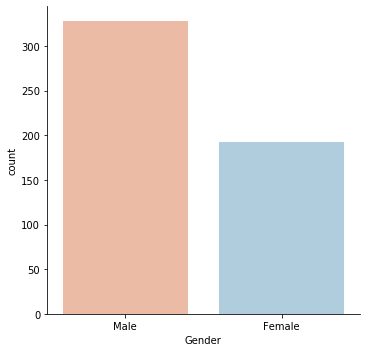

In [8]:
# Feature: Gender
sns.catplot(x='Gender', kind="count", palette='RdBu',data=diabetes_df);

There are more male participants in this dataset than females.

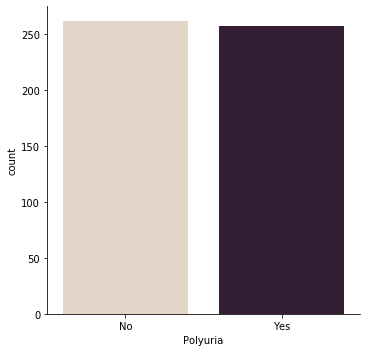

In [9]:
# Feature: Polyuria
sns.catplot(x='Polyuria', kind="count", palette="ch:.25", data=diabetes_df);


Polyuria is a condition where the body urinates more than usual and passes excessive or abnormally large amounts of urine each time you urinate. The number of patients who have Polyuria is approximately the same as those who do not have it.

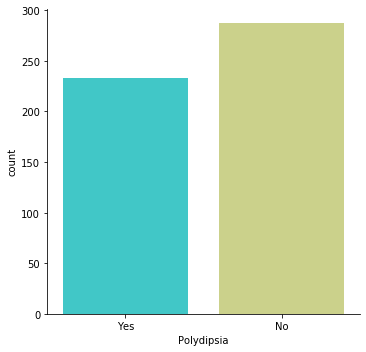

In [10]:
# Feature: Polydipsia

sns.catplot(x='Polydipsia', kind="count", palette="rainbow", data=diabetes_df);

Polydipsia is the term given to excessive thirst and is one of the initial symptoms of diabetes. Approximately 240 patients have this condition in this dataset.

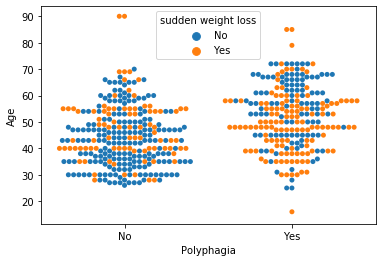

In [11]:
# Features: Polyphagia and sudden weight loss
sns.swarmplot(x="Polyphagia", y="Age", hue='sudden weight loss', data=diabetes_df)

Polyphagia is a medical term for exessive hunger or excessive eating. We can see that most of the patients have Polyphagia. Of those who have the condition, most of them have actually experienced sudden weight loss. This is despite the fact that they are eating a lot. A good number of these particular patients range around the ages of 30 and 81 years. 

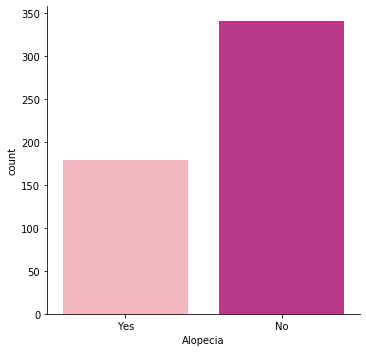

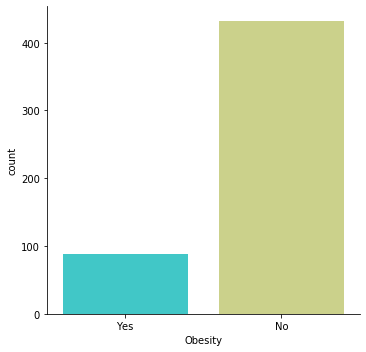

In [12]:
# Feature: Alopecia and Obesity
sns.catplot(x='Alopecia', kind="count", palette="RdPu", data=diabetes_df)
sns.catplot(x='Obesity', kind="count", palette="rainbow", data=diabetes_df)

Most of the patients have not experienced alopecia and are not obese. 

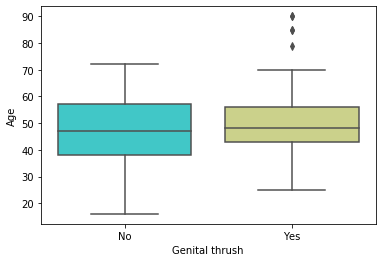

In [13]:
# Feature: Genital thrush
sns.boxplot(x='Genital thrush',y='Age',data=diabetes_df,palette='rainbow')

It is evident that more patients do not have Genital thrush. In addition to that, of those who have it, most of them are in the range  of 40-55 years. Just a few are of the ages of 80 and above.

We will now encode the features from categorical to numerical values in order to identify the correlation of features.

In [14]:
# Make copy to avoid changing original data 
label_df = diabetes_df.copy()


# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in categorical_features:
    label_df[col] = label_encoder.fit_transform(label_df[col])

diabetes_df =label_df

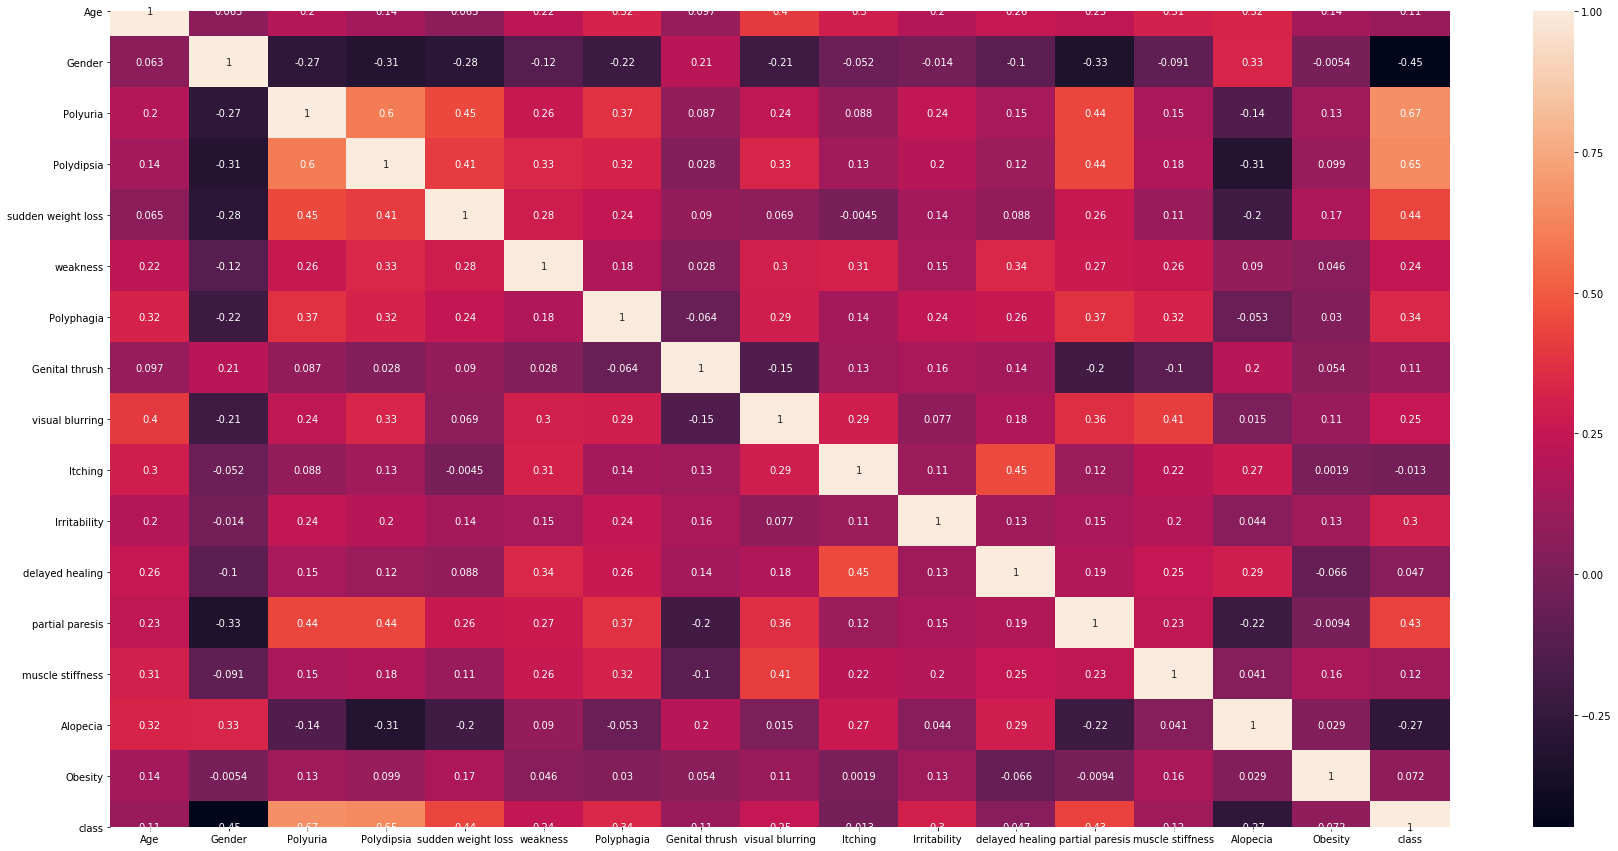

In [15]:
plt.figure(figsize=(30,15))
correlation = diabetes_df.corr()
sns.heatmap(correlation, annot=True)

From the heatmap above, we can see that Polyuria and Polydipsia are correlated with the target variable Class. This means that these two condition strongly determine whether a patient has Early Onset Diabetes or not.

Now that we are done with the data analysis. We can start building a model to make prediction.

# 4. Model

In [16]:
#Select the target and input variables, y is the target, X is the input

y= label_df['class']
X= label_df.drop(['class'], 1)

In [17]:
# First divide the data set into training, testing and validation data
X_train, X_valid, y_train, y_valid = train_test_split(X, y,train_size=0.70, random_state=42, shuffle=True )
X_validation, X_test, y_validation, y_test = train_test_split(X_valid, y_valid,train_size=0.50, shuffle=True, random_state=42 )

We will first compare two classifiers to determine the best performing one to use for our Diabetes Rik Indicator. 
These are the Random Forest Classifier and SVM classifier.
SVM stands for Support Vector Machines, it is a classifier that finding a hyperplane between two classes of data 
Random Forest operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

In [18]:
classifiers=[]
#Random Forest 
rf = RandomForestClassifier()
classifiers.append(rf)

#
sv = svm.SVC()
classifiers.append(sv)



for clf in classifiers:
    clf.fit(X_train, y_train)
    preds=clf.predict(X_validation)
    acc = accuracy_score(y_validation, preds)
    print("Accuracy of %s is %s"%(clf, acc))

Accuracy of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is 0.9743589743589743
Accuracy of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) is 0.9871794871794872


C:\Users\Emmanuella\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Emmanuella\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


We see that the SVM classifiers obtains a higher accuracy hence we will use it to make our final predictions

In [ ]:
predictions_final=sv.predict(X_test)
accuracy_test=accuracy_score(y_test, predictions_final)
print('Accuracy of testing data is is %s'%(accuracy_test))

In [ ]:
# Final Predictions
#Write results of predictions to csv file
predictions_file = pd.DataFrame({'Age': X_test['Age'],'Diabetes_indicator': predictions_final})
predictions_file.to_csv('diabetes.csv', index=False)
print("Done with predictions!")